<a href="https://colab.research.google.com/github/aenaghai/dep/blob/main/cp301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
#api key dataset: kaggle datasets download -d chinafax/cfpw-dataset
#!kaggle datasets download -d dataset_name

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "aenaghai5"
os.environ['KAGGLE_KEY'] = "3e96f462e03063f3137e83401b19d220"

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
od.download(
	"https://www.kaggle.com/datasets/chinafax/cfpw-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aenaghai5
Your Kaggle Key: ··········


100%|██████████| 81.6M/81.6M [00:00<00:00, 112MB/s]


In [ ]:
'''
#vgg16:16 layers:convolutional+fully connected
#pooling layers=reduce the size of the image

this model takes too long to train and has a very high number of parameters.
So to resolve this we will useTransfer Learning and Fine tuning.
Transfer Learning is the learning relies on previously learned task.It makes learning faster and improves accuracy.
Fine Tuning: The process to remove the last layer of the pre-trained network and replace it with our new relevant layers to our own problem.

'''

In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import pickle #a standard Python library for serializing and deserializing Python objects to and from binary data streams.
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

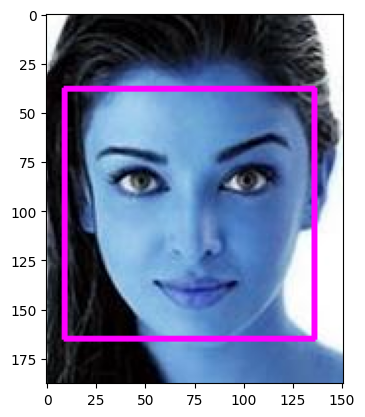

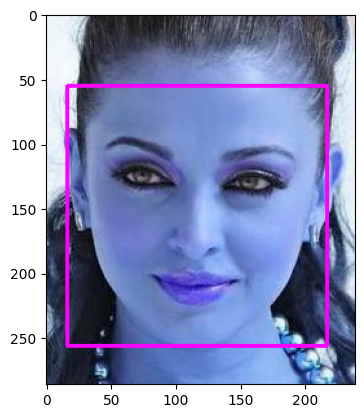

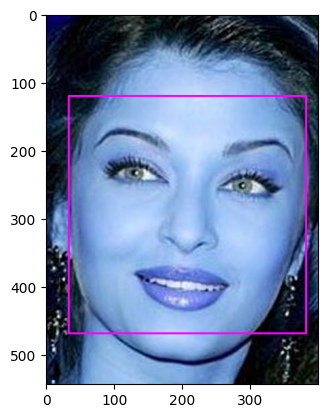

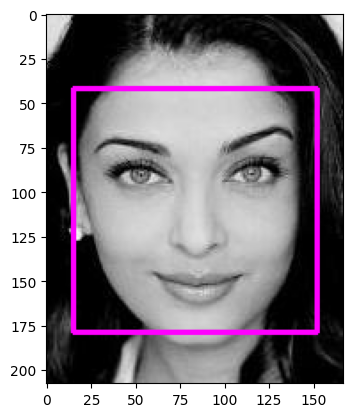

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped



Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped

Photo skipped



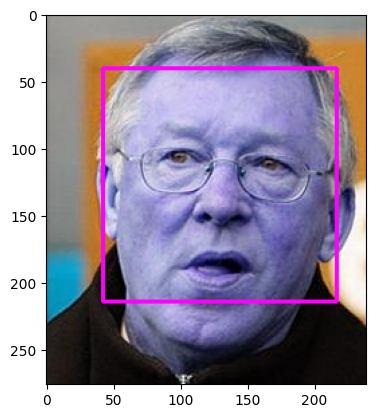

Photo skipped



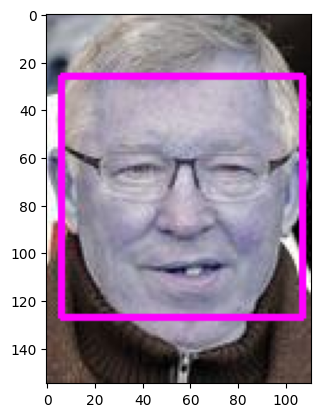

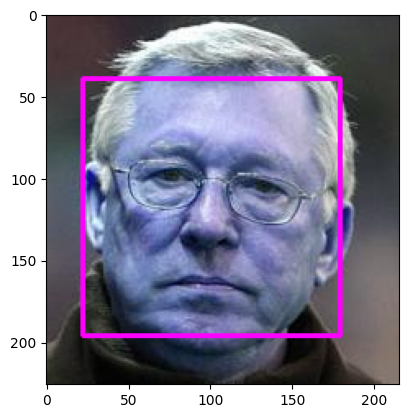

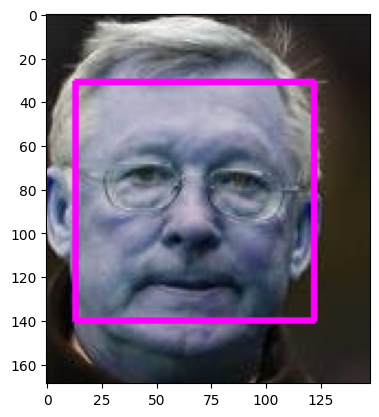

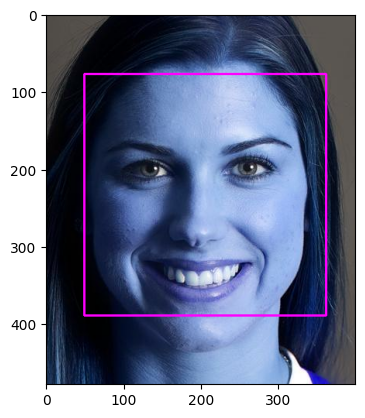

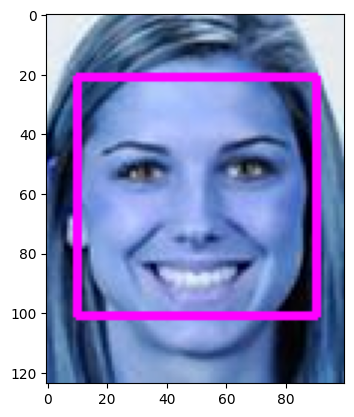

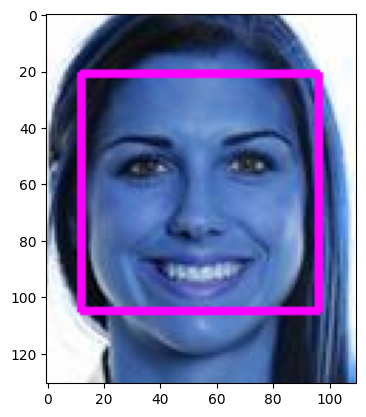

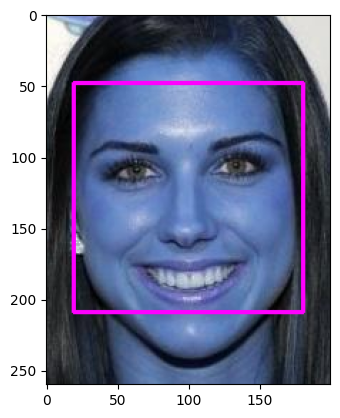

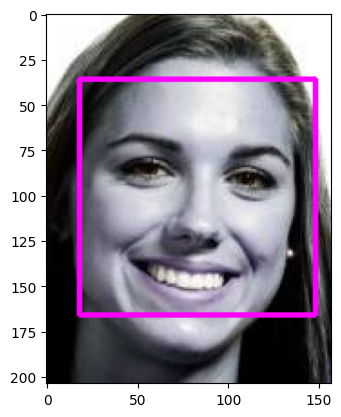

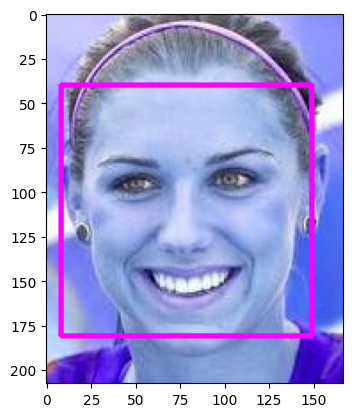

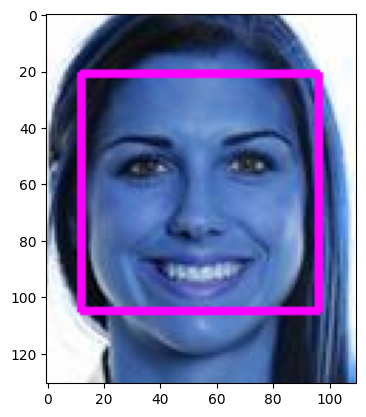

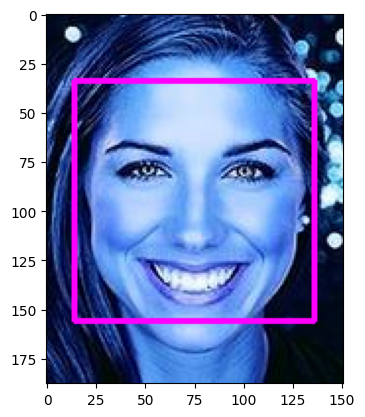

Photo skipped



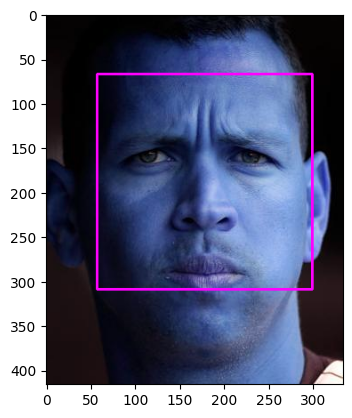

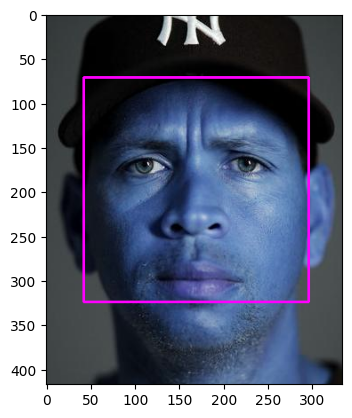

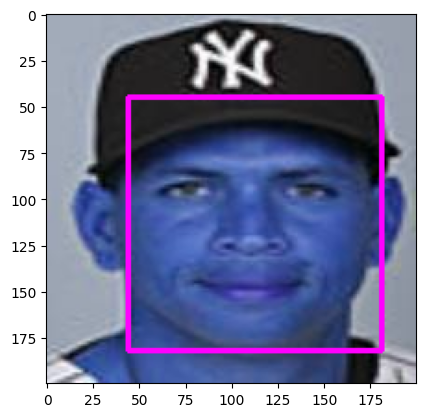

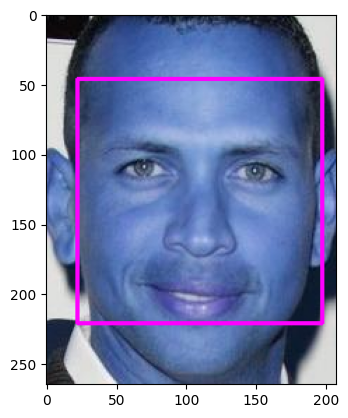

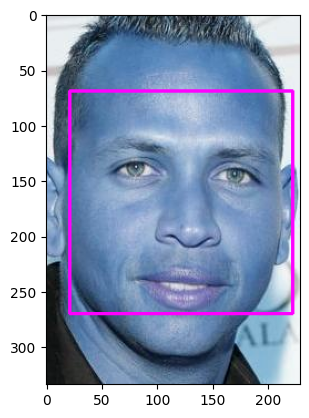

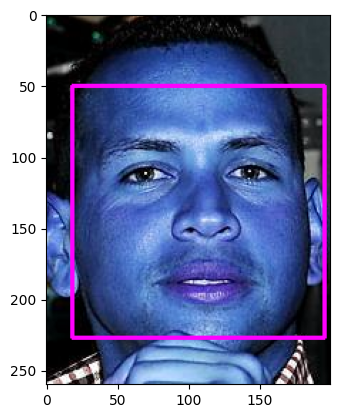

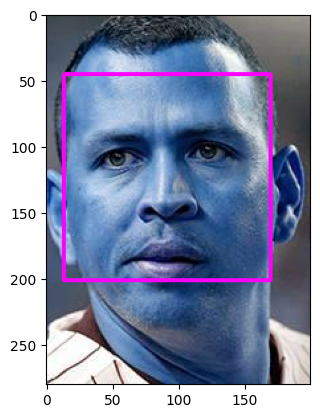

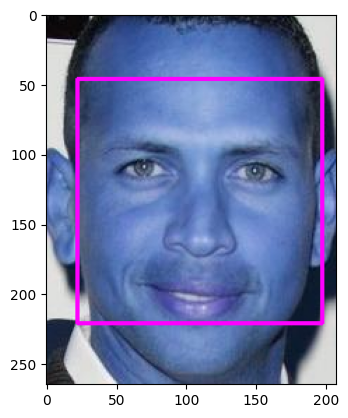

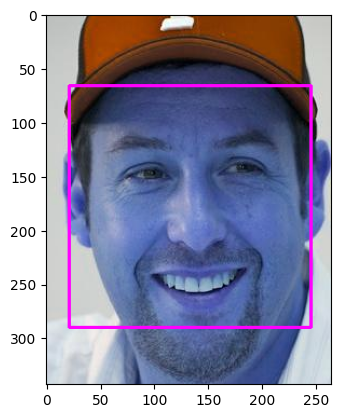

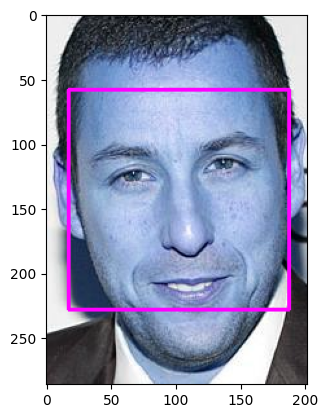

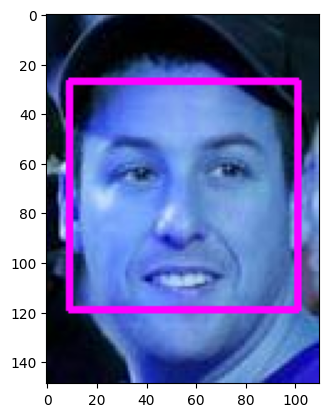

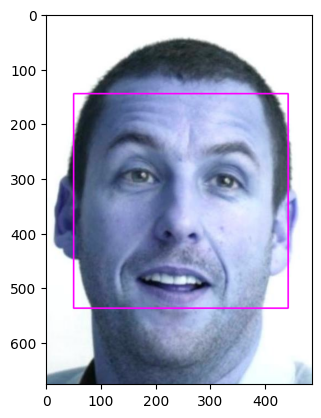

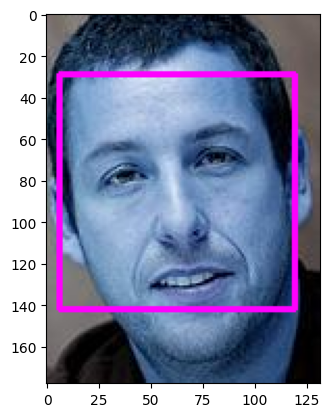

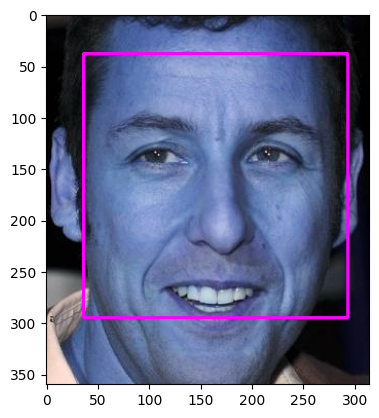

In [ ]:
import cv2
import os
import numpy as np
from PIL import Image

folder='/content/drive/MyDrive/dataset'
width_img=224
height_img=224

# for detecting faces
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# setting the directory containing the images
img_dir=os.path.join(".", folder)
curr_id=0
label_ids={}

# iterating through all the files in each subdirectory
for root, _, files in os.walk(img_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
            path=os.path.join(root, file) # path of the image

            # get the label name (name of the person)
            label=os.path.basename(root).replace(" ", ".").lower()

            # add the label (key) and its number (value)
            if not label in label_ids:
                label_ids[label]=curr_id
                curr_id+=1

            # loading the image
            imgtest=cv2.imread(path, cv2.IMREAD_COLOR)
            image_array=np.array(imgtest, "uint8")

            # get detected faces
            faces=face_cascade.detectMultiScale(imgtest,scaleFactor=1.1,minNeighbors=5)

            # if exactly 1 face is not detected, skip this photo
            if len(faces)!=1:
                print(f'Photo skipped\n')
                continue

            # save the faces detected and associate with label
            for (x, y, w, h) in faces:
                face_detect=cv2.rectangle(image_array,(x, y),(x+w, y+h),(255,0,255), 2)
                plt.imshow(face_detect)
                plt.show()

                # resize the detected face to 224x224
                size=(width_img, height_img)

                # detected face region; region of interest
                roi=image_array[y:y + h, x:x + w]

                # resize the detected head to target size
                resized_image=cv2.resize(roi, size)
                image_array=np.array(resized_image, "uint8")

                # replace the image with only the face
                im = Image.fromarray(image_array)
                im.save(path)


In [ ]:
import os
import pandas as pd
import numpy as np
import keras.api._v2.keras as keras
import matplotlib.pyplot as plt
from keras.api._v2.keras.layers import Dense, GlobalAveragePooling2D
from keras.api._v2.keras.preprocessing import image
from keras.api._v2.keras.applications.mobilenet import preprocess_input
from keras.api._v2.keras.preprocessing.image import ImageDataGenerator
from keras.api._v2.keras.models import Model
from keras.api._v2.keras.optimizers import Adam
from keras.applications import vgg16

In [ ]:
#augmenting the images using ImageDataGenerator
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/dataset',target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)

Found 510 images belonging to 51 classes.


In [ ]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
NO_CLASSES=len(train_generator.class_indices.values())
print(NO_CLASSES)
#print(label_ids)

51


In [ ]:
!pip install keras_vggface
from keras.utils.layer_utils import get_source_inputs 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
img_rows,img_cols=224,244
model=vgg16.VGG16(include_top=False,input_shape=(img_rows,img_cols,3),pooling='avg')
#include_top=False means that you're not interested in the last layer of the model.
print(len(model.layers))
# 26 layers in the original VGG-Face

58889256/58889256 [==============================] - 1s 0us/step
20


In [ ]:
'''base_model=VGGFace(include_top=False,model='vgg16',input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers'''

"base_model=VGGFace(include_top=False,model='vgg16',input_shape=(224, 224, 3))\nbase_model.summary()\nprint(len(base_model.layers))\n# 19 layers after excluding the last few layers"

USED DIRECTLY

In [ ]:
import numpy as np
import cv2
import os
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load VGG16 model without the top layer
vgg16 = VGG16(weights='imagenet', include_top=False)

# Load VGG16 model without the top layer
vgg16 = VGG16(weights='imagenet', include_top=False)

# Add custom top layer for face recognition
x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg16.input, outputs=predictions)

In [ ]:
for layer in model.layers:
    layer.trainable = False
#Freeze the layers of the pre-trained VGG16 model so that they will not be updated during training.

In [ ]:
def layer_adder(bottom_model, num_classes):
    top_model = bottom_model.output
    #top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model

In [ ]:
num_classes=4
FC_Head = layer_adder(model, num_classes)
model = Model(inputs = model.input, outputs = FC_Head)
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [ ]:
#### REFERENCE ####


import numpy as np
import cv2
import os
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load VGG16 model without the top layer
vgg16 = VGG16(weights='imagenet', include_top=False)

# Add custom top layer for face recognition
x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg16.input, outputs=predictions)

# Load weights for the custom top layer
model.load_weights('/content/vgg_face_weights.h5')

# Load dataset for training
dataset_path = '/content/cfpw-dataset/cfp-dataset/Data/Images'
img_size = (224, 224)
data = []
labels = []
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        img = image.img_to_array(img)
        img = preprocess_input(img)
        data.append(img)
        labels.append(folder_name)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model on testing set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predict faces on new image
img = cv2.imread('test_image.jpg')
img = cv2.resize(img, img_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

prediction = model.predict(img)

class_index = np.argmax(prediction)
class_label = label_encoder.inverse_transform(class_index)

print('Predicted class:', class_label)

OSError: ignored